In [102]:
import numpy as np
import skimage
import utils
import pathlib
import matplotlib.pyplot as plt

In [103]:
def otsu_thresholding(im: np.ndarray) -> int:
    """
        Otsu's thresholding algorithm that segments an image into 1 or 0 (True or False)
        The function takes in a grayscale image and outputs a threshold value

        args:
            im: np.ndarray of shape (H, W) in the range [0, 255] (dtype=np.uint8)
        return:
            (int) the computed thresholding value
    """
    assert im.dtype == np.uint8
    ### START YOUR CODE HERE ### (You can change anything inside this block) 
    def histogram(im):
        histogram = np.zeros(256)
        for i in range(len(im)):
            for j in range(len(im[0])):
                histogram[im[i,j]] += 1
        return histogram / np.prod(im.shape)

    # Generate the intensity histogram and find the global average intensity
    p = histogram(im)
    global_mean = sum([i*p[i] for i in range(len(p))])

    # Calculate all probabilities for class 1, P1(k), cumulative mean, m(k), for all k
    p1_k = np.array([sum([p[i] for i in range(k)]) for k in range(255)])
    mean_cumu = np.array([sum([i*p[i] for i in range(k)]) for k in range(255)])

    # Calculate between-variance using P1(k) and cumulative mean m(k)
    between_variance = ((global_mean*p1_k-mean_cumu)**2) / (p1_k*(1-p1_k))

    # Get the k for which between-variance is highest (here, ignoring nan-values)
    threshold = np.nanargmax(between_variance)

    return threshold
    ### END YOUR CODE HERE ###

In [104]:
if __name__ == "__main__":
    # DO NOT CHANGE
    impaths_to_segment = [
        pathlib.Path("thumbprint.png"),
        pathlib.Path("rice-shaded.png")
    ]
    for impath in impaths_to_segment:
        im = utils.read_image(impath)
        threshold = otsu_thresholding(im)
        print("Found optimal threshold:", threshold)

        # Segment the image by threshold
        segmented_image = (im >= threshold)
        assert im.shape == segmented_image.shape, "Expected image shape ({}) to be same as thresholded image shape ({})".format(
                im.shape, segmented_image.shape)
        assert segmented_image.dtype == bool, "Expected thresholded image dtype to be bool. Was: {}".format(
                segmented_image.dtype)

        segmented_image = utils.to_uint8(segmented_image)

        save_path = "{}-segmented.png".format(impath.stem)
        utils.save_im(save_path, segmented_image)

Reading image: images\thumbprint.png


C:\Users\andre\AppData\Local\Temp\ipykernel_10596\199338786.py:29: RuntimeWarning: invalid value encountered in divide
  between_variance = ((global_mean*p1_k-mean_cumu)**2) / (p1_k*(1-p1_k))


Found optimal threshold: 154
Saving image to: image_processed\thumbprint-segmented.png
Reading image: images\rice-shaded.png
Found optimal threshold: 135
Saving image to: image_processed\rice-shaded-segmented.png


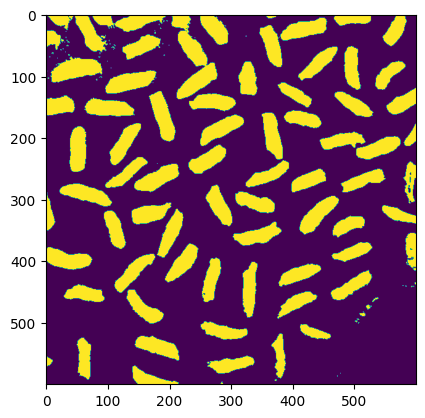

In [105]:
# We can also plot the thresholded image:
g = lambda x,y: 1 if im[x,y] > threshold else 0
thresholded_im = np.array([[g(i,j) for j in range(len(im[i]))] for i in range(len(im))])
plt.imshow(thresholded_im)